In [1]:
import time
import numpy as np
import dxchange
from utils import nor_phase
from ganrec2 import GANphase
import os
from lib import visualize
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
energy = 11
z = 7.8880960e-2
pv = 1.04735263e-7
iter_num = 500
fname_data = 'data/gan_phase/data_spider.tif'
kwargs = {'energy': energy, 'z': z, 'pv': pv, 'iter_num': iter_num, 'phase_only': False, 'save_wpath': 'data/gan_phase/spider_abs_ratio/', 'init_wpath': 'data/gan_phase/spider_abs_ratio/', 'init_model': False}
data = dxchange.read_tiff(fname_data)
nprj, px,  py = data.shape
data = nor_phase(data)
abs_ratio = 0.01

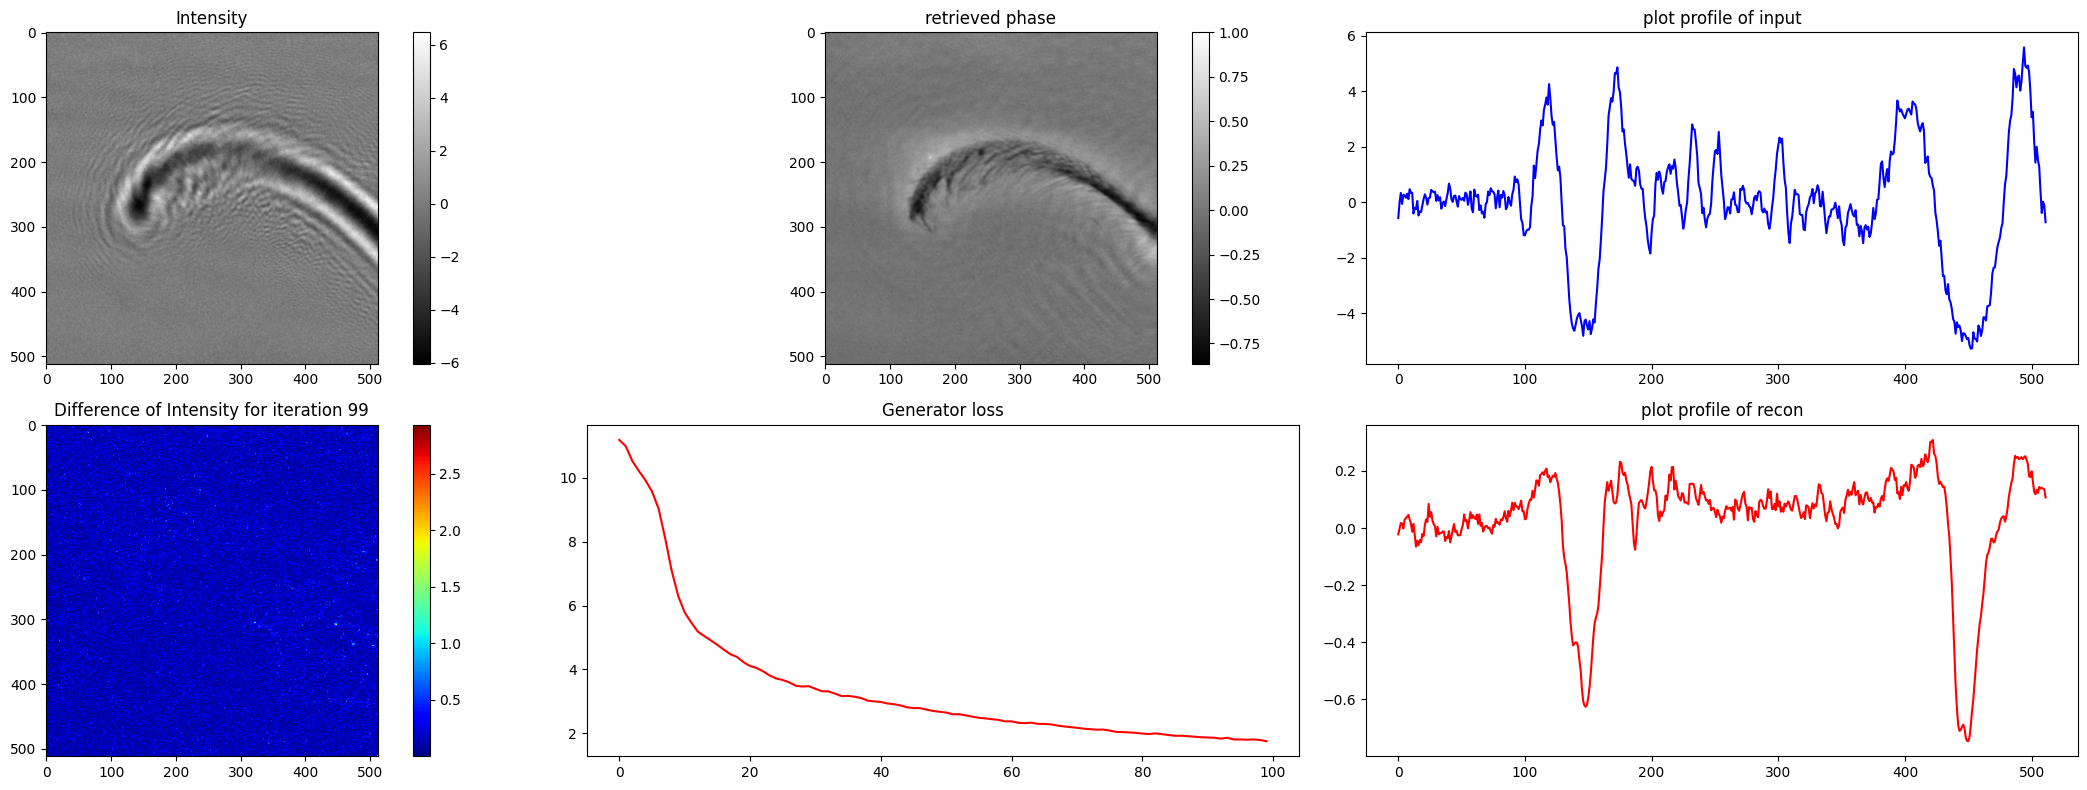

Iteration 100: G_loss is 1.7502719163894653 and D_loss is 2.77488374710083
Iteration 200: G_loss is 1.307407021522522 and D_loss is 2.6732001304626465
Iteration 300: G_loss is 1.26527738571167 and D_loss is 2.5784993171691895
Iteration 400: G_loss is 1.2583298683166504 and D_loss is 2.266986846923828
Iteration 500: G_loss is 1.3676197528839111 and D_loss is 2.180324077606201


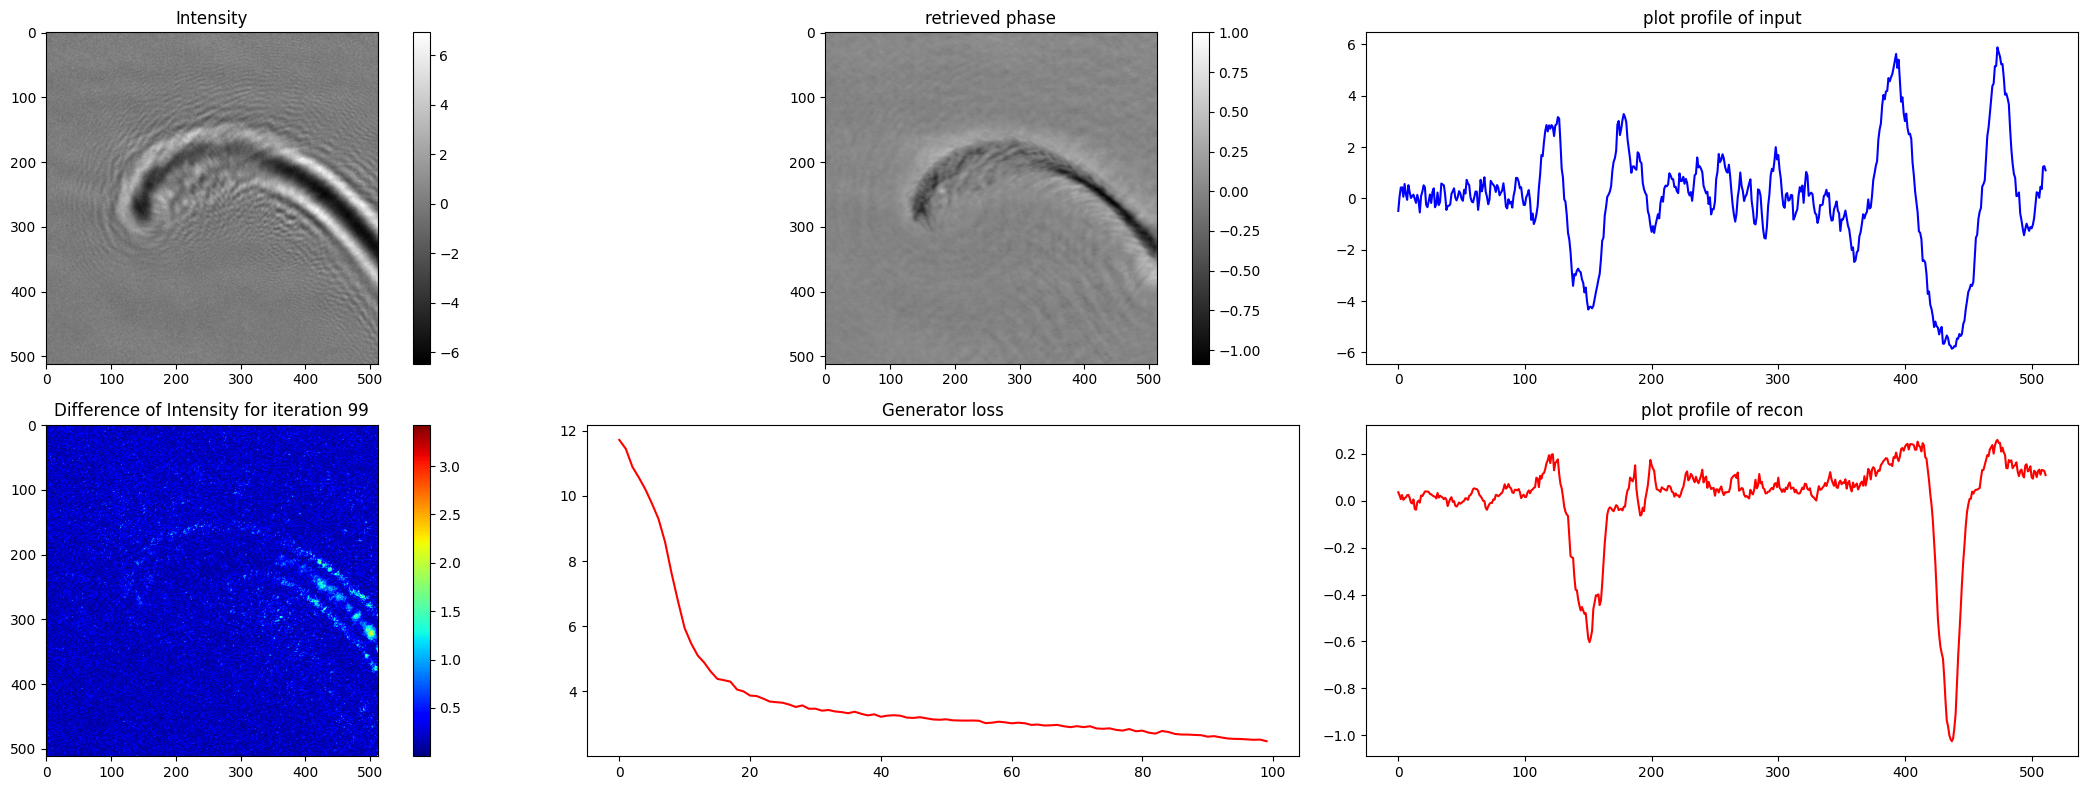

Iteration 100: G_loss is 2.4752297401428223 and D_loss is 2.5361287593841553
Iteration 200: G_loss is 1.6667510271072388 and D_loss is 2.7626259326934814
Iteration 300: G_loss is 1.4457745552062988 and D_loss is 2.7272443771362305
Iteration 400: G_loss is 1.4619070291519165 and D_loss is 2.4466395378112793
Iteration 500: G_loss is 1.380737066268921 and D_loss is 2.3968913555145264


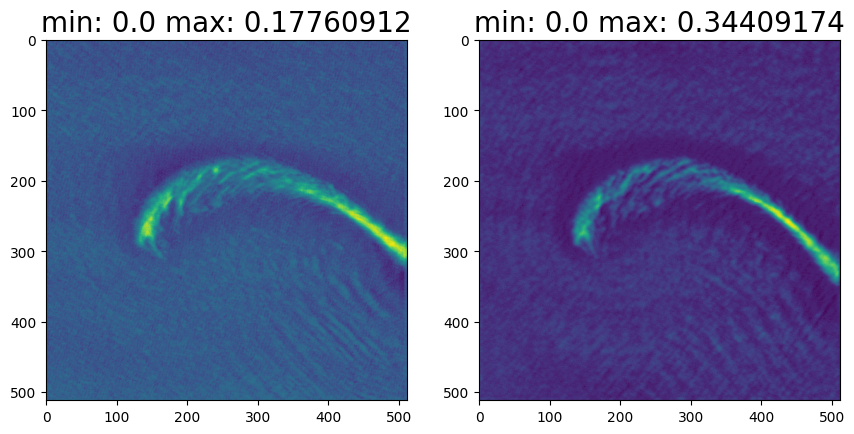

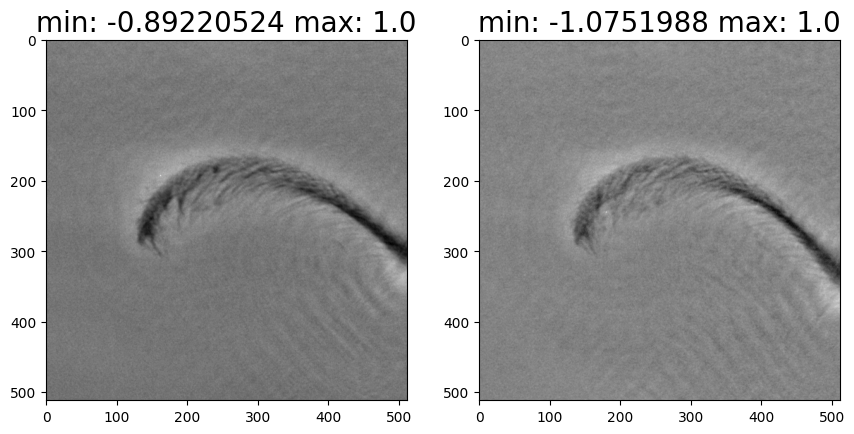

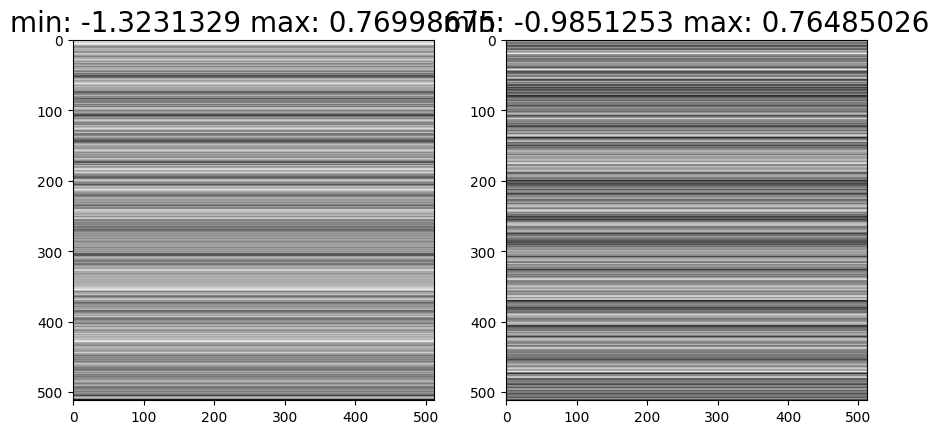

In [4]:
abs_ratio_all = np.arange(0.01, 0.1, 0.05)

absorption = np.zeros(shape=(abs_ratio_all.shape[0], px, py), dtype=np.float32)
phase = np.zeros(shape=(abs_ratio_all.shape[0], px, py), dtype=np.float32)
propagated = np.zeros(shape=(abs_ratio_all.shape[0], px, py), dtype=np.float32)
loss = np.zeros(shape=(abs_ratio_all.shape[0], 1), dtype=np.float32)
time_count = np.zeros(shape=(abs_ratio_all.shape[0], 1), dtype=np.float32)

for i, abs_ratio in enumerate(abs_ratio_all):
    kwargs['save_wpath'] = None
    kwargs['init_model'] = False
    gan_phase_object = GANphase(data[i*10], **kwargs)
    start = time.time()
    absorption[i], phase[i],propagated[i], loss[i]  = gan_phase_object.recon
    end = time.time()
    time_count[i] = end - start
    # 

visualize(absorption)
visualize(phase)

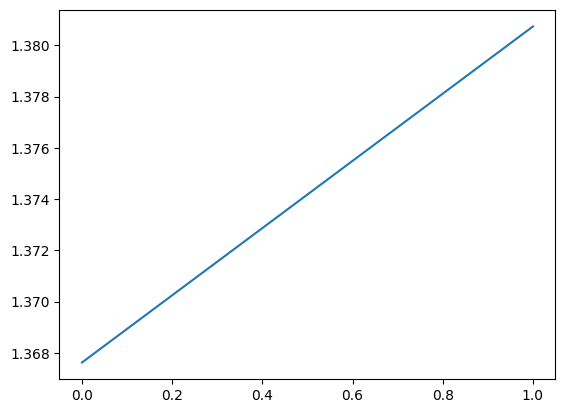

In [7]:
from matplotlib import pyplot as plt
plt.plot(loss)

In [11]:
data[0].shape

(512, 512)

In [14]:
from ganrec_dataloader import measure_reconstruction_quality, tf_reshape, tfback_phase
matched = tfback_phase( propagated[0], data[0])
measure_reconstruction_quality(img1=matched, img2 = tf_reshape(data[0]), experiment_name = 'spider_hair', csv_file = 'spider_hair.csv', iteration = kwargs['iter_num'], save = True, epoch_time = time_count[0], total_time = np.sum(time_count))

                                                           0
experiment_name                                  spider_hair
iter                                                     500
sum of pointwise difference                         6.638252
sum of absolute value of pointwise difference     457.905457
sum of squared difference                        1044.820435
PSNR                                            [-3.0977168]
SSIM                                           [0.002622005]
NRMSE                                              32.323681
MSSIM                                                  [0.0]
epoch_time                                        [39.20475]
total_time                                         78.502029


,0,0
experiment_name,spider_hair,spider_hair
iter,500,500
sum of pointwise difference,-32.682312,6.638252
sum of absolute value of pointwise difference,324.86633,457.905457
sum of squared difference,567.36005,1044.820435
PSNR,[-0.44588786],[-3.0977168]
SSIM,[0.0089336],[0.002622005]
NRMSE,23.81932,32.323681
MSSIM,[0.0223766],[0.0]
epoch_time,[39.20475],[39.20475]


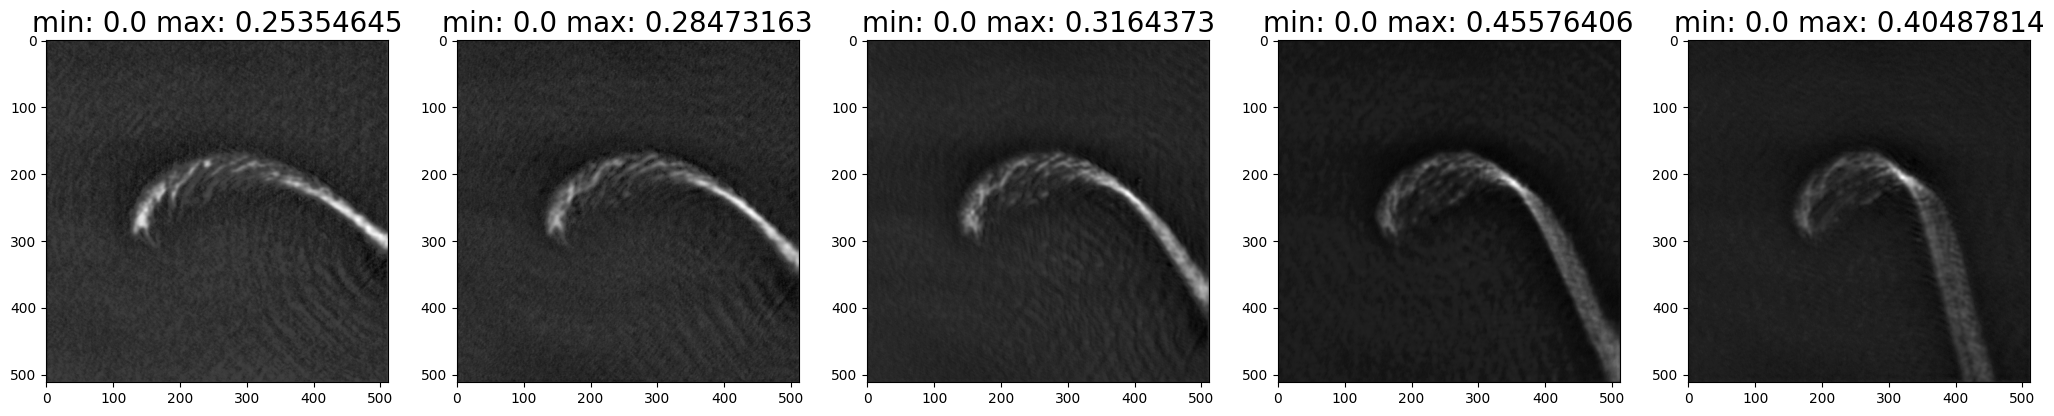

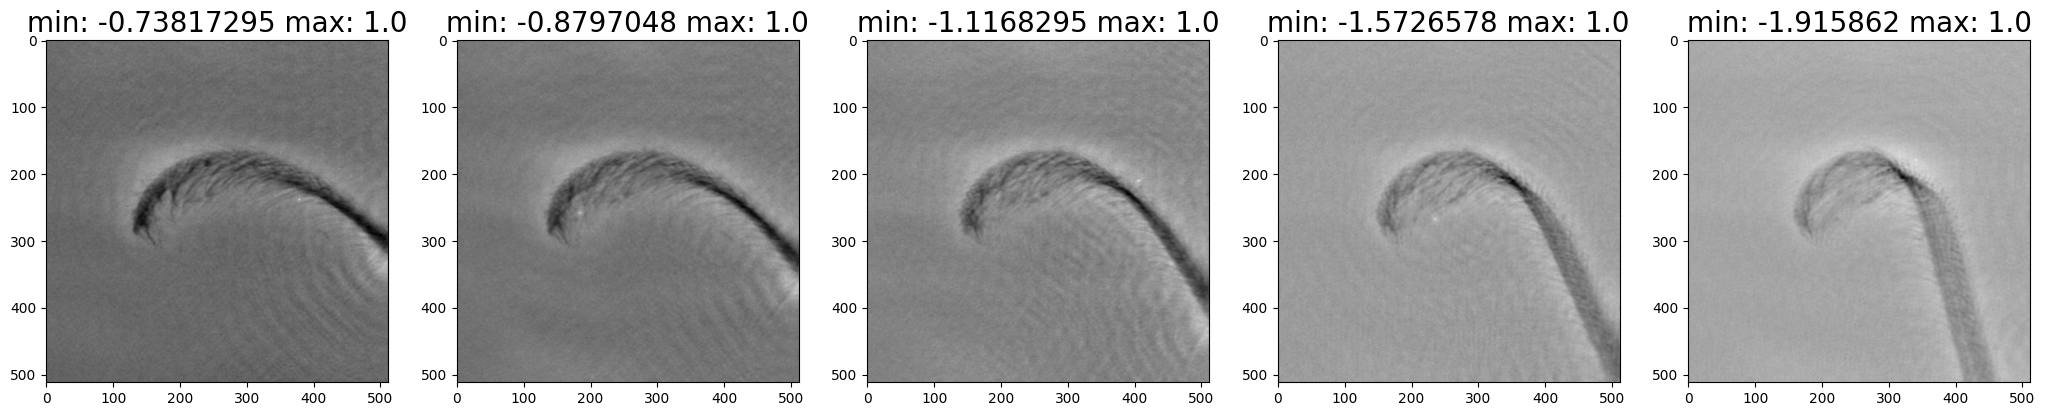

In [7]:
# abs_ratio_all = np.arange(0.01, 0.1, 0.01)

# absorption = np.zeros(shape=(abs_ratio_all.shape[0], px, py), dtype=np.float32)
# phase = np.zeros(shape=(abs_ratio_all.shape[0], px, py), dtype=np.float32)
# time_count = np.zeros(shape=(abs_ratio_all.shape[0], 1), dtype=np.float32)
# kwargs['init_model'] = False
# kwargs['save_wpath'] = None
# for i, abs_ratio in enumerate(abs_ratio_all):
#     gan_phase_object = GANphase(data[i*10], **kwargs)
#     start = time.time()
#     absorption[i], phase[i] = gan_phase_object.recon
#     end = time.time()
#     time_count[i] = end - start
#     kwargs['init_model'] = False